# 1. Importing Libraries & Analyzing Dataframe

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Dataset
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [4]:
# Looking for NaNs
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# 2. Exploratory Data Analysis

## Balance of Dataset

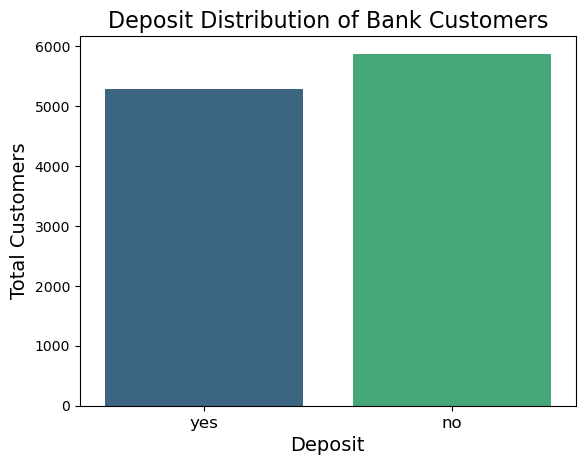

In [5]:
fig, ax = plt.subplots()
sns.countplot(x ='deposit', data = df, palette = 'viridis')

plt.title('Deposit Distribution of Bank Customers', fontsize = 16)
plt.xlabel('Deposit', fontsize = 14)
plt.ylabel('Total Customers', fontsize = 14)
plt.xticks(fontsize = 12)

# Show the plot
plt.show()

Dataset is well balanced

## Balance vs Deposits of Customers

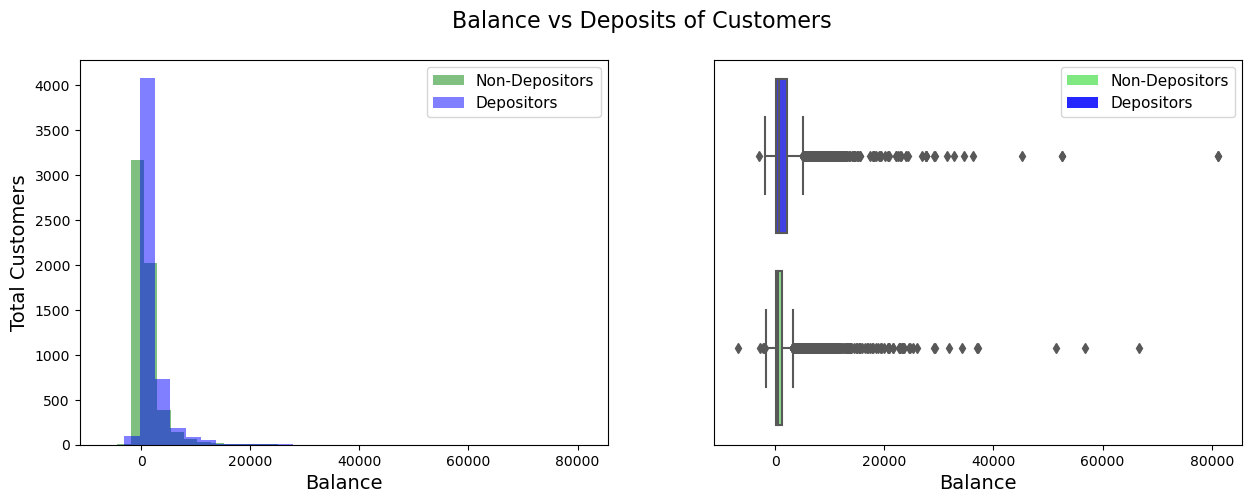

In [6]:
from matplotlib.patches import Patch
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Balance vs Deposits of Customers", size = 16)

# Subplot 1
ax[0].hist(df[df["deposit"]=='no']["balance"], bins=30, alpha=0.5, color="green", label="Non-Depositors")
ax[0].hist(df[df["deposit"]=='yes']["balance"], bins=30, alpha=0.5, color="blue", label="Depositors")

ax[0].set_xlabel("Balance", fontsize=14)
ax[0].set_ylabel("Total Customers", fontsize=14)
ax[0].legend(fontsize = 11);

# Subplot 2
sns.boxplot(x="balance", y="deposit", data=df, orient="h", palette={ 'no':"#80e880", 'yes':"#2626ff"}, ax = ax[1])
ax[1].get_yaxis().set_visible(False)
ax[1].set_xlabel('Balance', fontsize=14)

color_patches = [
    Patch(facecolor="#80e880", label="Non-Depositors"),
    Patch(facecolor="#2626ff", label="Depositors")
]
ax[1].legend(handles=color_patches, fontsize=11);

* Most of the customers of bank have <b>smaller balance</b>. 
* Customers with all range of balance <b>make deposits</b>. 
* But, most of the <b>deposits</b> are received from customers with balance in range of <b>(0, 1250)</b>.

## Age vs Deposits of Customers

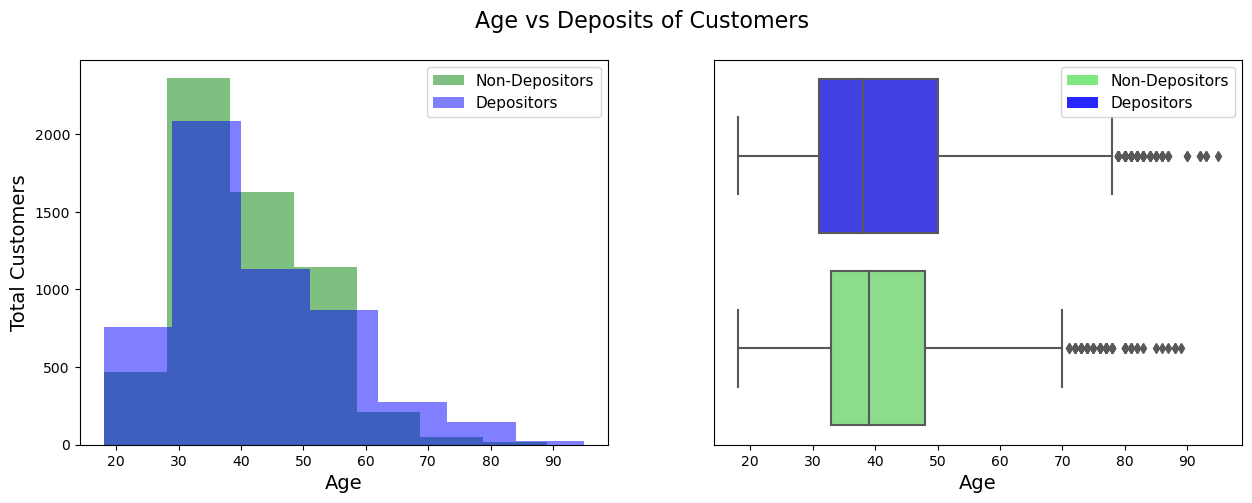

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Age vs Deposits of Customers", size = 16)

# Subplot 1
ax[0].hist(df[df["deposit"]=='no']["age"], bins=7, alpha=0.5, color="green", label="Non-Depositors")
ax[0].hist(df[df["deposit"]=='yes']["age"], bins=7, alpha=0.5, color="blue", label="Depositors")

ax[0].set_xlabel("Age", fontsize=14)
ax[0].set_ylabel("Total Customers", fontsize=14)
ax[0].legend(fontsize = 11);

# Subplot 2
sns.boxplot(x="age", y="deposit", data=df, orient="h", palette={ 'no':"#80e880", 'yes':"#2626ff"}, ax = ax[1])
ax[1].get_yaxis().set_visible(False)
ax[1].set_xlabel('Age', fontsize=14)

color_patches = [
    Patch(facecolor="#80e880", label="Non-Depositors"),
    Patch(facecolor="#2626ff", label="Depositors")
]
ax[1].legend(handles=color_patches, fontsize=11);

* Customers of <b>all age</b> groups make <b>deposits</b>.
* Most of the customers are in the age group of <b>(25, 55) years</b>. A larger part of them are <b>non-depositors</b>. 
* Most of the customers <b>above 60</b> years make <b>deposits</b>. 
* Most of the customers <b>below 25</b> years make <b>deposits</b>. 

## Job vs Deposit of Customers

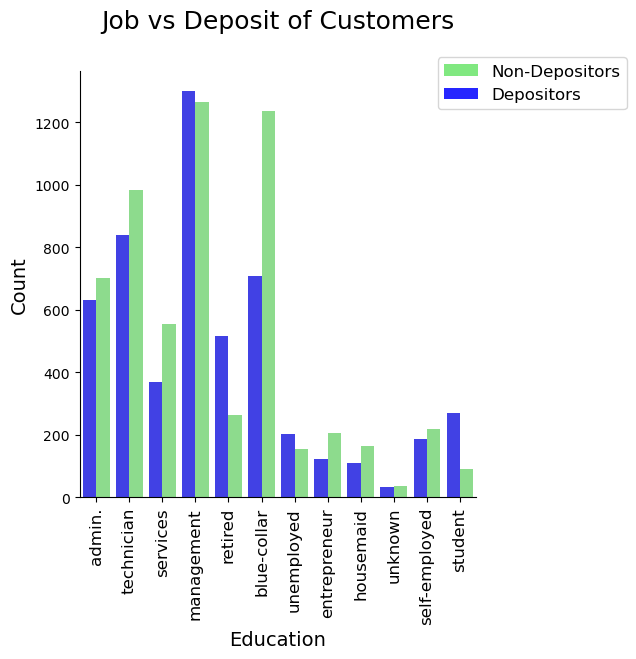

In [8]:
fig, ax = plt.subplots()

sns.catplot("job", hue = 'deposit', data=df, kind="count", palette={'no':"#80e880", 'yes':"#2626ff"}, legend = False)

color_patches = [
    Patch(facecolor="#80e880", label="Non-Depositors"),
    Patch(facecolor="#2626ff", label="Depositors")
]

plt.title("Job vs Deposit of Customers", size = 18, y=1.08) 
plt.xlabel("Education", size = 14)
plt.ylabel("Count", size = 14)
plt.xticks(size = 12, rotation = 'vertical')
plt.legend(handles = color_patches, fontsize = 12,  bbox_to_anchor=(1.4,1.05))

plt.close(1) 

* Customers from managment, retired, unemployed and student <b>jobtypes</b> prefer to <b>deposit</b>. 
* Customers in <b>services and blue-collar</b> jobs deposit considerably <b>less</b>. 

## Marital vs Deposit of Customers

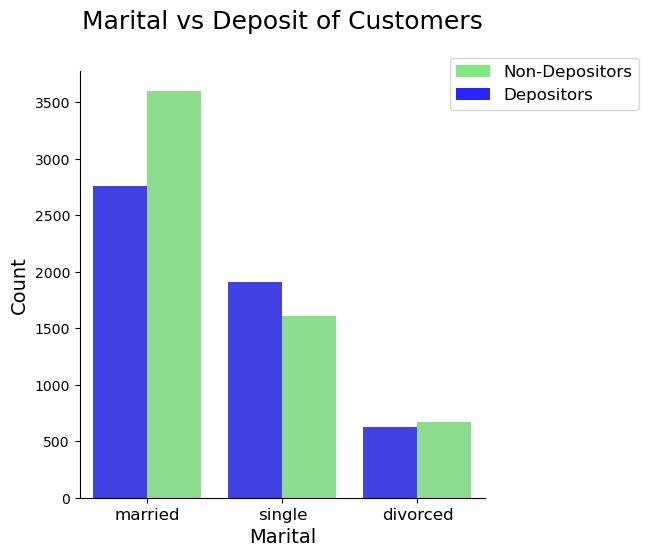

In [9]:
fig, ax = plt.subplots()

sns.catplot("marital", hue = 'deposit', data=df, kind="count", palette={'no':"#80e880", 'yes':"#2626ff"}, legend = False)

color_patches = [
    Patch(facecolor="#80e880", label="Non-Depositors"),
    Patch(facecolor="#2626ff", label="Depositors")
]

plt.title("Marital vs Deposit of Customers", size = 18, y=1.08) 
plt.xlabel("Marital", size = 14)
plt.ylabel("Count", size = 14)
plt.xticks(size = 12)
plt.legend(handles = color_patches, fontsize = 12,  bbox_to_anchor=(1.4,1.05))

plt.close(1) 

* <b>Fewer</b> married customers prefer to <b>deposit</b>. 
* <b>Larger</b> single customers prefer to <b>deposit</b>.

## Education vs Deposit of Customers

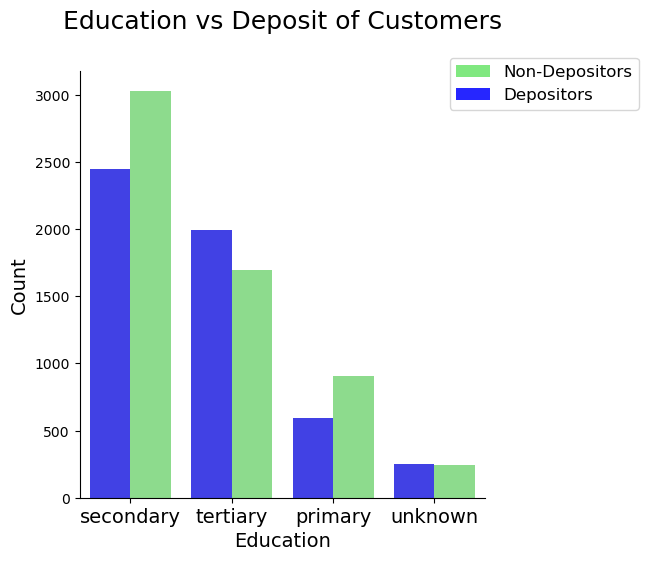

In [10]:
fig, ax = plt.subplots(figsize = (15,5))

sns.catplot("education", hue = 'deposit', data=df, kind="count", palette={'no':"#80e880", 'yes':"#2626ff"}, legend = False)

color_patches = [
    Patch(facecolor="#80e880", label="Non-Depositors"),
    Patch(facecolor="#2626ff", label="Depositors")
]

plt.title("Education vs Deposit of Customers", size = 18, y=1.08) 
plt.xlabel("Education", size = 14)
plt.ylabel("Count", size = 14)
plt.xticks(size = 14)
plt.legend(handles = color_patches, fontsize = 12,  bbox_to_anchor=(1.4,1.05))

plt.close(1) 

* <b>Tertiary</b> educated customers prefer to <b>deposit</b>. 
* Customers with other education type <b>deposit less</b>. 

# 3. Converting Columns to Categorical Numbers

In [11]:
col_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome', 'deposit', 'contact']

for col in col_list:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


## Column Distribution

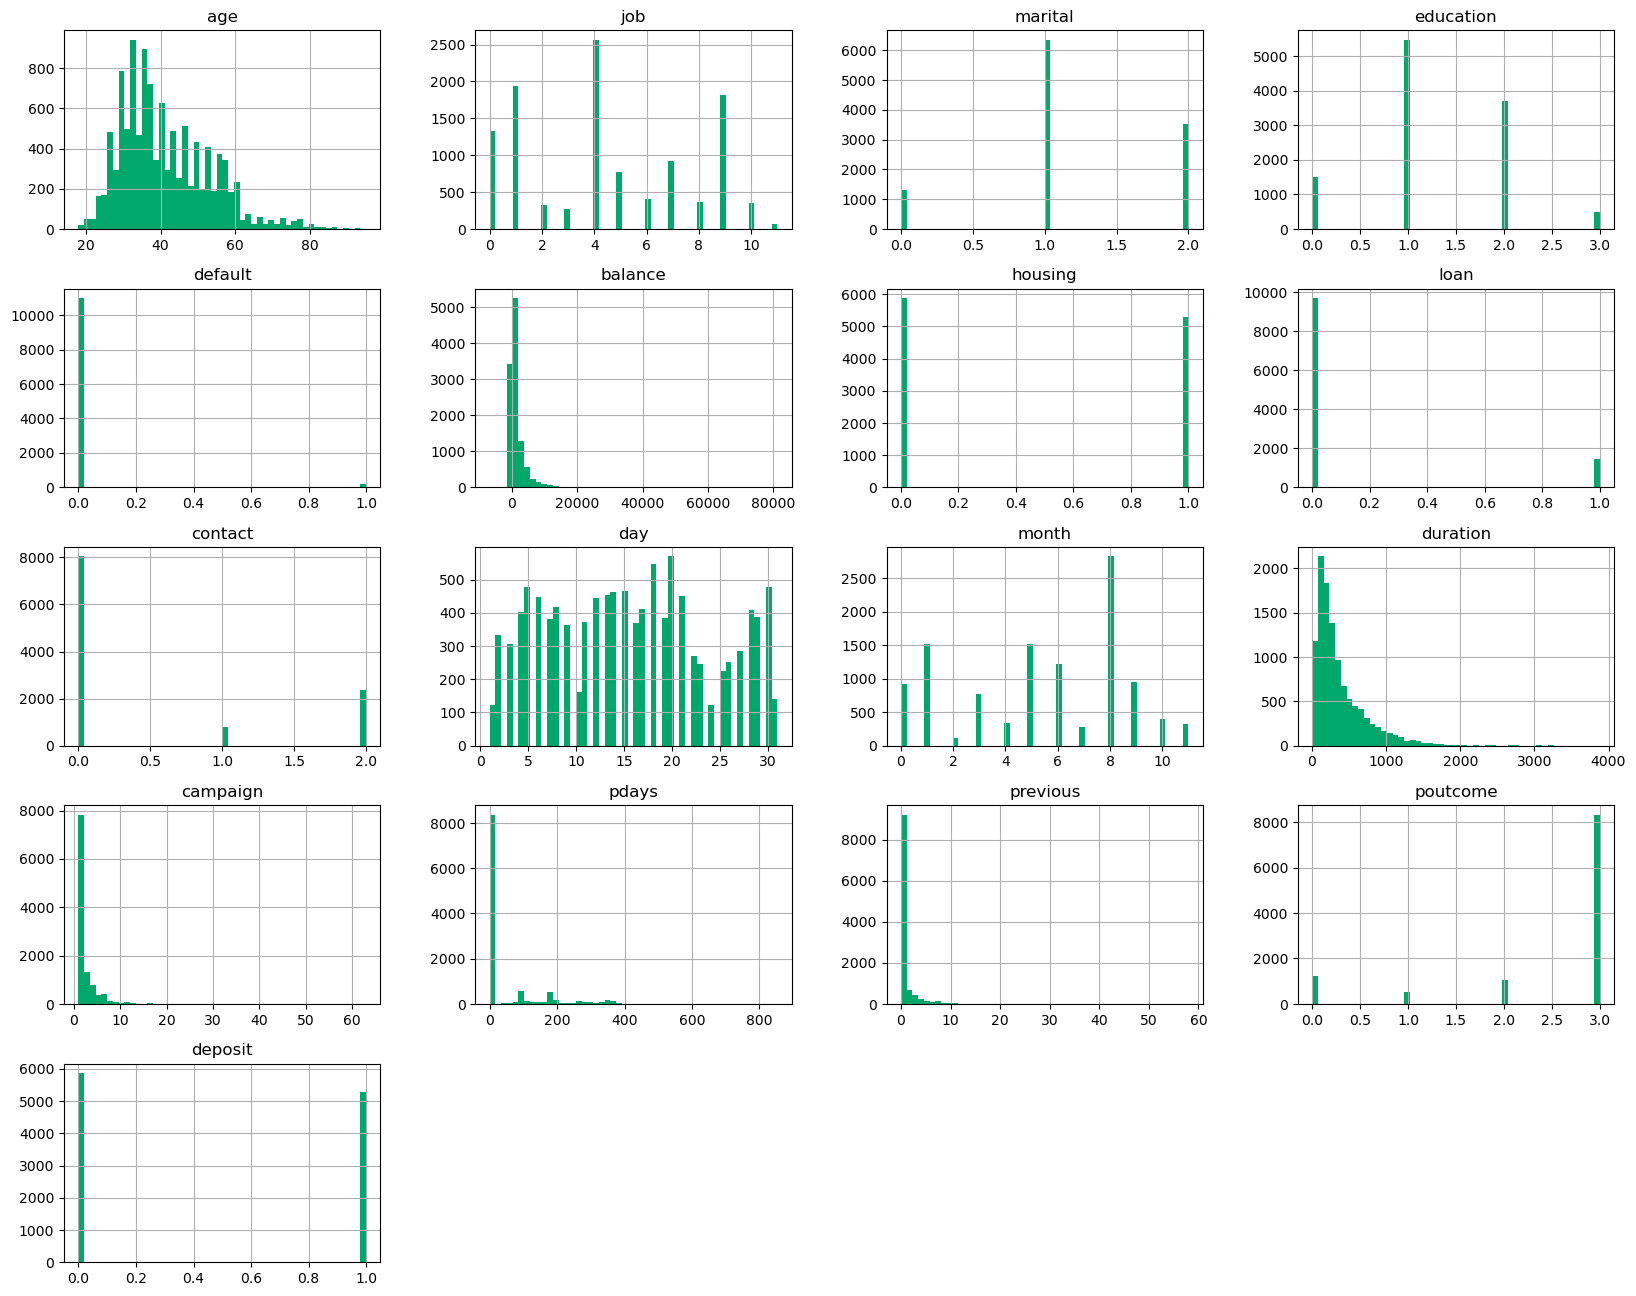

In [12]:
%matplotlib inline
df.hist(bins = 50, figsize=(20,16), color = '#00A86B') 
plt.show()


days, duration, previous, campaign, balance seem to consist of outliers

# 4. Removing Outliers 

## Grubbs Function for Outlier Detection

In [13]:
import scipy
import scipy.stats as stats

def outlier_cols(x): 
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    return col if (g_critical) < g_calculated else 0

## Finding Columns with Outliers

In [14]:
import numpy as np

cols_with_outliers = []
for col in df.columns:
    outlier_col = outlier_cols(df[col])
    cols_with_outliers.append(outlier_col)

while (cols_with_outliers.count(0)):
    cols_with_outliers.remove(0)
print('Columns with outliers are: {}'.format(cols_with_outliers) )

Columns with outliers are: ['default', 'balance', 'duration', 'campaign', 'pdays', 'previous']


## Removing Outliers Using Scaling

In [15]:
for col in cols_with_outliers:
  if col != 'pdays' and col != 'balance':    # pdays and balance have negative values, so scaling will result in NaNs
    df[col] = (df[col]**(1/3.7))

# 5. Columns that Still have Outliers

In [16]:
# Columns still possessing outliers
any_outlier_col = []
for col in cols_with_outliers:
    outlier_col = outlier_cols(df[col])
    any_outlier_col.append(outlier_col)

while (any_outlier_col.count(0)): 
    any_outlier_col.remove(0)
any_outlier_col

['default', 'balance', 'campaign', 'pdays', 'previous']

## Grubbs Function Function for Validating Outlier Removal

In [17]:
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")

## Removing Cubical Transform from Columns with Outliers

In [18]:
for col in any_outlier_col:
  if col != 'pdays' and col != 'balance':
    df[col] = (df[col]**(3.7))  

## Individually Removing Outliers from Columns

* ###  'balance' Column

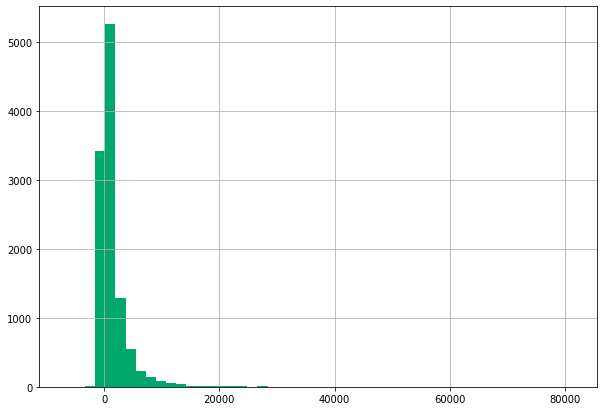

In [19]:
# Plotting histogram
%matplotlib inline
df['balance'].hist(bins = 50, figsize=(10,7), color = '#00A86B') 
plt.show()

In [18]:
# Removing outliers
cut_off = 11000
for i in df['balance']:
    if i >= cut_off:
        df['balance'] = df['balance'].replace(i, cut_off)

grubbs_test(df['balance'])

Grubbs Calculated Value: 4.377039763193229
Grubbs Critical Value: 4.585737088805695
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier



* ### 'campaign' Column

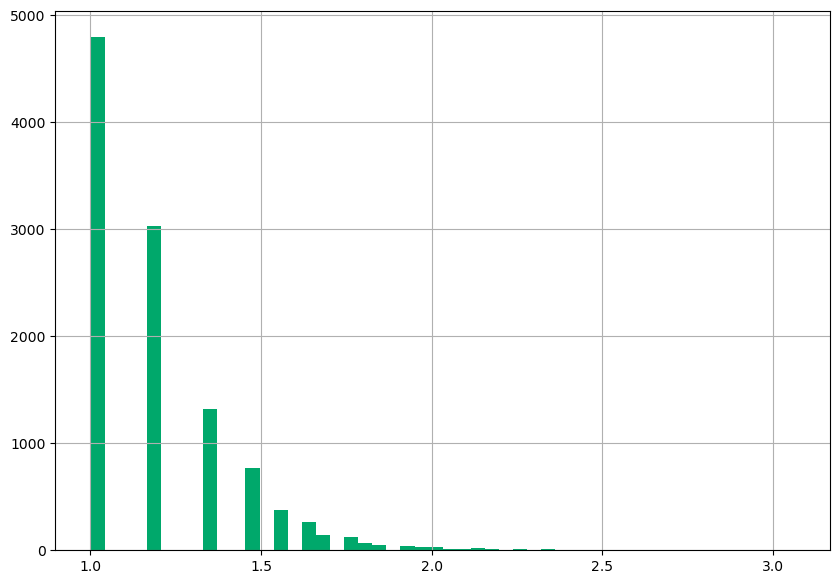

In [19]:
# Plotting histogram
%matplotlib inline
df['campaign'].hist(bins = 50, figsize=(10,7), color = '#00A86B') 
plt.show()

In [20]:
# Removing outliers
cut_off = 12
for i in df['campaign']:
    if i >= cut_off:
        df['campaign'] = df['campaign'].replace(i, cut_off)

grubbs_test(df['campaign'])

Grubbs Calculated Value: 7.605644561762079
Grubbs Critical Value: 4.585737088805695
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



* ### 'previous' Column

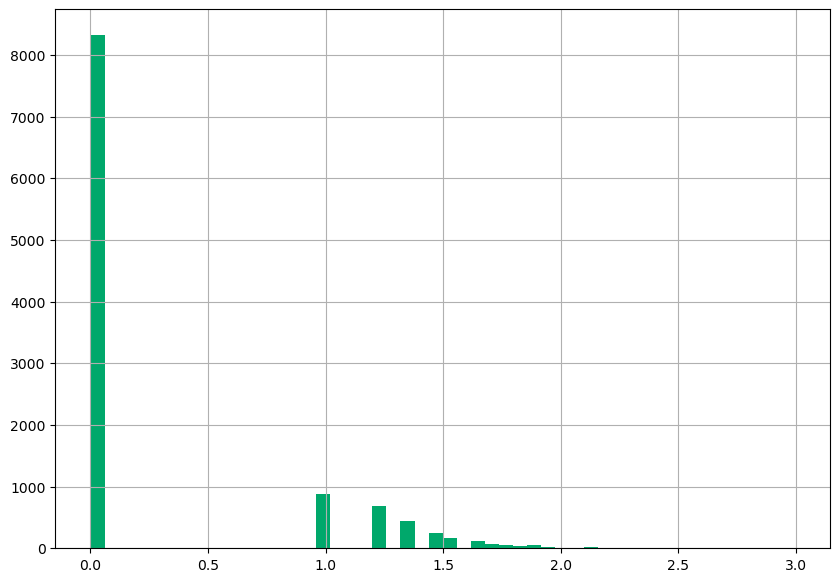

In [21]:
# Plotting histogram
%matplotlib inline
df['previous'].hist(bins = 50, figsize=(10,7), color = '#00A86B') 
plt.show()

In [22]:
# Removing Outliers 
cut_off = 8
for i in df['previous']:
    if i >= cut_off:
        df['previous'] = df['previous'].replace(i, cut_off)

grubbs_test(df['previous'])

Grubbs Calculated Value: 4.6050502762291
Grubbs Critical Value: 4.585737088805695
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



* ### 'pdays' Column

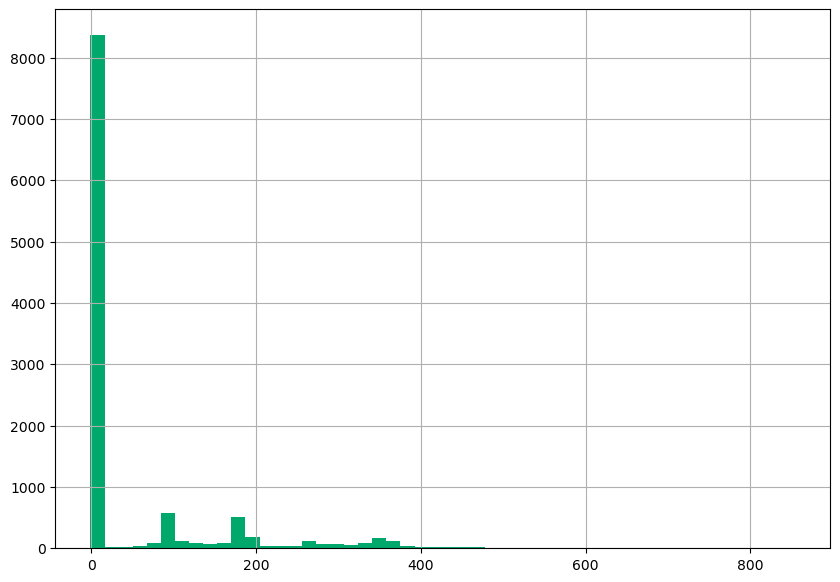

In [23]:
# Plotting histogram
%matplotlib inline
df['pdays'].hist(bins = 50, figsize=(10,7), color = '#00A86B') 
plt.show()

In [24]:
# Removing Outliers 
cut_off = 500
for i in df['pdays']:
    if i >= cut_off:
        df['pdays'] = df['pdays'].replace(i, cut_off)

grubbs_test(df['pdays'])

Grubbs Calculated Value: 4.278614474702936
Grubbs Critical Value: 4.585737088805695
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier



## Verifying no NaN inclusions

In [25]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# 6. Computing Correlation

## Plotting Correlation Heatmap

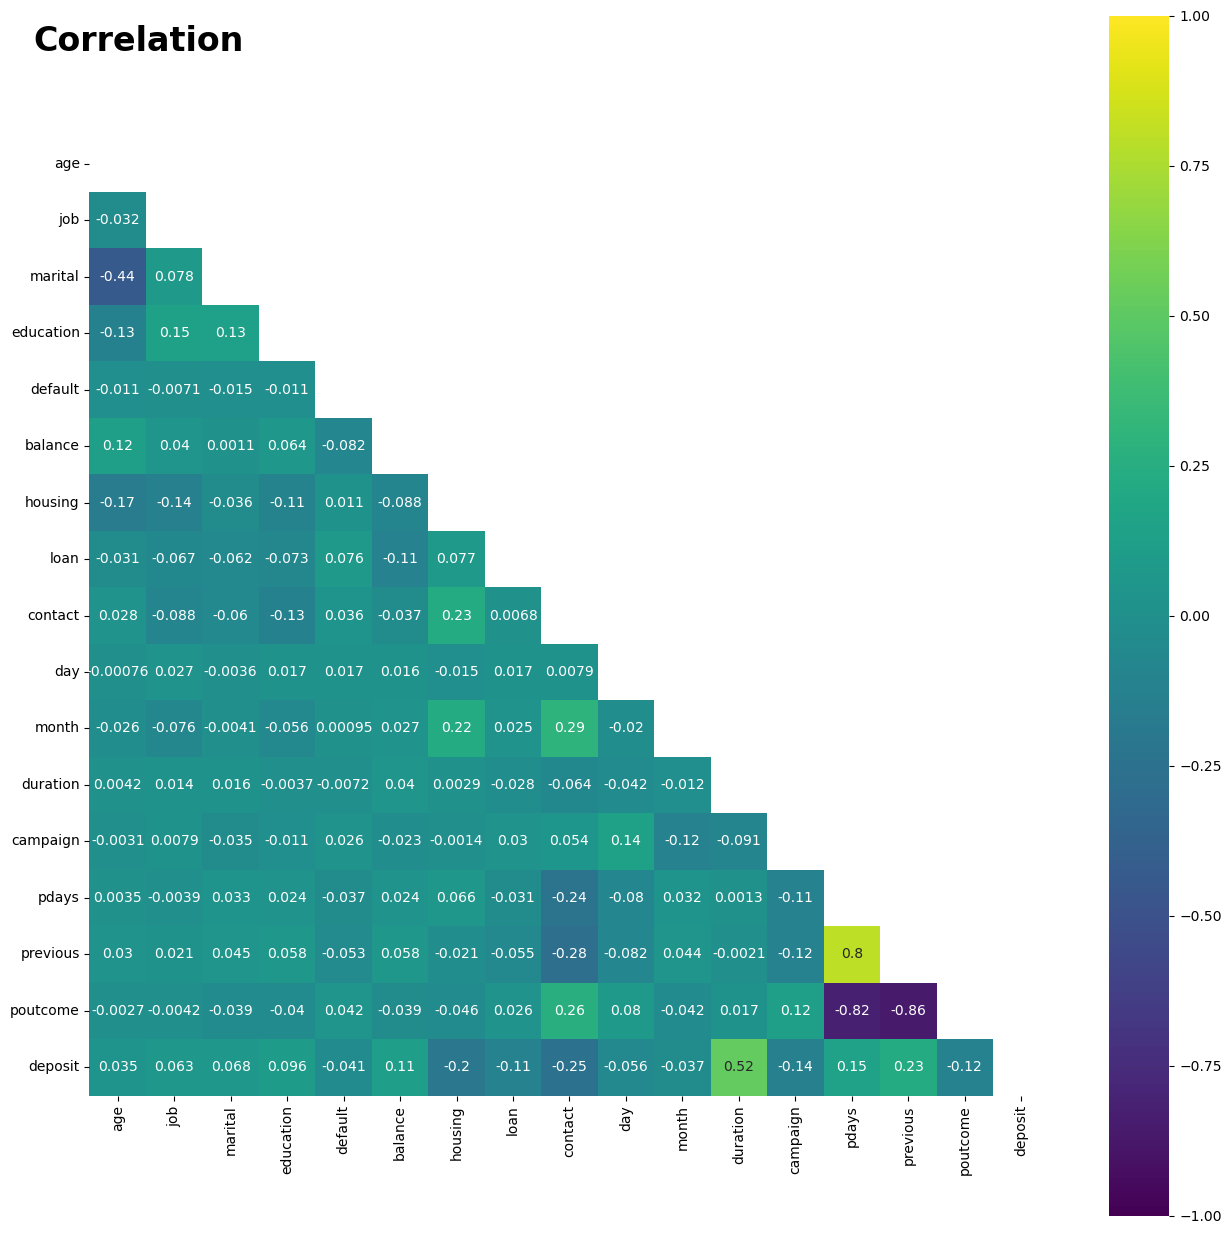

In [26]:
# fig
fig= plt.figure(figsize=(12, 12))

# mask
mask = np.triu(df.corr())

# axes 
axes = fig.add_axes([0, 0, 1, 1])
sns.heatmap(df.dropna().corr(), annot=True, mask=mask, square=True,fmt='.2g',vmin=-1, vmax=1, center= 0, cmap='viridis',
            linecolor='white', cbar_kws= {'orientation': 'vertical'}, ax=axes) 

# title
axes.text(-1, -1.5, 'Correlation', color='black', fontsize=24, fontweight='bold')

fig.show()

## Printing Feature Correlations

In [27]:
corr_matrix = df.corr()
corr_matrix['deposit'].sort_values()

contact     -0.249847
housing     -0.203888
campaign    -0.139633
poutcome    -0.122369
loan        -0.110580
day         -0.056326
default     -0.040680
month       -0.037121
age          0.034901
job          0.063395
marital      0.067610
education    0.095948
balance      0.110295
pdays        0.153562
previous     0.225199
duration     0.518332
deposit      1.000000
Name: deposit, dtype: float64

# 7. Adding Features

In [28]:
# feature -I
df['dur_pdays'] = ((df['duration'] + df['previous']**0.15 - (df['contact']**2)**0.0003 )**2)**0.25

# feature -II
df['contact_housing'] = (df['housing'])**(0.2) + (df['campaign'])**(0.35)  + df['contact']**(0.2)

In [29]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,dur_pdays,contact_housing
0,59,0,1,1,0.0,2343,1,0,2,5,8,6.540936,1.000000,-1,0.0,3,1,2.353831,3.148698
1,56,0,1,1,0.0,45,0,0,2,5,8,7.174505,1.000000,-1,0.0,3,1,2.484771,2.148698
2,41,9,1,1,0.0,1270,1,0,2,5,8,7.069342,1.000000,-1,0.0,3,1,2.463519,3.148698
3,55,7,1,1,0.0,2476,1,0,2,5,8,5.580458,1.000000,-1,0.0,3,1,2.140103,3.148698
4,54,0,1,2,0.0,184,0,0,2,5,8,5.812037,1.206034,-1,0.0,3,1,2.193541,2.216464


In [30]:
corr_matrix = df.corr()
corr_matrix['deposit'].sort_values()

contact_housing   -0.292183
contact           -0.249847
housing           -0.203888
campaign          -0.139633
poutcome          -0.122369
loan              -0.110580
day               -0.056326
default           -0.040680
month             -0.037121
age                0.034901
job                0.063395
marital            0.067610
education          0.095948
balance            0.110295
pdays              0.153562
previous           0.225199
duration           0.518332
dur_pdays          0.572457
deposit            1.000000
Name: deposit, dtype: float64

## Computing Correlation 

Added features have good correlation with deposit column.

# 8. Train-Test Splitting

## Splitting Train-Test Set

In [31]:
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 65)
for train_index, test_index in split.split(df, df['deposit']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]
      
print(f"Rows in train set : {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set : 8929
Rows in test set: 2233



## Preparing Train-Test Sets and Labels

In [32]:
# train_set
train_labels = train_set["deposit"].copy()    # Storing feature in labels variable
train_set = train_set.drop(["deposit", 'default', 'job'], axis = 1)       # Dropping 'default' and 'job' column to improve accuracy

# test_set
test_labels = test_set["deposit"].copy()     # Storing feature in labels variable
test_set = test_set.drop(["deposit", 'default', 'job'], axis = 1)   # Dropping 'default' and 'job' column to improve accuracy

# 9. Classification Using ML Models

## DecisionTreeClassifier

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

# Declaring and fitting classifier model
dtc = DecisionTreeClassifier()
dtc.fit(train_set, train_labels)
    
# Test set prediction
dtc_predict = dtc.predict(test_set)

# Evaluating predictions
dtc_accuracy = accuracy_score(test_labels, dtc_predict)
dtc_cm = confusion_matrix(test_labels, dtc_predict)

# Printing classification report 
print('DecisionTreeClassifier Report:\n')
print(classification_report(test_labels, dtc_predict))
print('Accuracy of DecisionTreeClassifier is: {}'.format(dtc_accuracy))

DecisionTreeClassifier Report:

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1175
           1       0.75      0.75      0.75      1058

    accuracy                           0.77      2233
   macro avg       0.77      0.76      0.77      2233
weighted avg       0.77      0.77      0.77      2233

Accuracy of DecisionTreeClassifier is: 0.7657859381997313


In [38]:
# Defining custom color map
import matplotlib.colors

norm = matplotlib.colors.Normalize(-1,1)
colors = [[norm(-1.0), "#e9fcdc"], 
          [norm(-0.6), "#d9f0c9"], 
          [norm( 0.6), "#4CBB17"],
          [norm( 1.0), "#0B6623"]]

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


Text(0.5, 23.52222222222222, 'Predicted Values \n \n Accuracy: 0.7658')

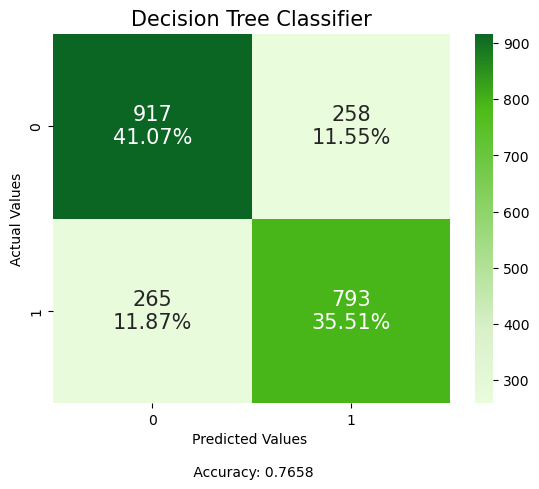

In [39]:
import pylab

plt.title('Decision Tree Classifier', size = 15)

# Declaring heatmap labels
group_counts = ['{0:0.0f}'.format(value) for value in dtc_cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in dtc_cm.flatten()/np.sum(dtc_cm)]

labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Plotting heatmap 
sns.heatmap(dtc_cm, annot=labels, annot_kws={"size": 15}, fmt = '', cmap=cmap)

# Adding figure labels
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values \n \n Accuracy: {}'.format(round(dtc_accuracy, 4)))

